In [1]:
import pandas as pd   
import sklearn as sklearn#importing all the required libraries
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as plt
from sklearn import preprocessing
import numpy  as np

In [2]:
df=pd.read_csv('dataset_football_cleaned.csv',encoding='latin-1')  
df

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12706,Neto,Eduardo,30,Brazil,J1League,NagoyaGrampus,0,0,DefensiveMidfield,1350000.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
12707,Soma,Yuki,21,Japan,J1League,NagoyaGrampus,0,0,Midfielder,75000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12708,Fujii,Haruya,18,Japan,J1League,NagoyaGrampus,0,0,Defender,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12709,Takeda,Yohei,31,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [3]:
print(df.columns)
print(df.info())                 #understanding the data
print(df.shape)
print(df.head())

Index(['name', 'first_name', 'age', 'nation', 'league', 'team',
       'goals_selection', 'selections_nation', 'position', 'price',
       'end_contract', 'goal_champ', 'assist_champ', 'own_goal_champ',
       'sub_on_champ', 'sub_out_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'penalty_goal_champ',
       'conceded_goal_champ', 'clean_sheet_champ', 'goal_cup', 'assist_cup',
       'own_goal_cup', 'sub_on_cup', 'sub_out_cup', 'yellow_card_cup',
       'second_yellow_card_cup', 'red_card_cup', 'penalty_goal_cup',
       'conceded_goal_cup', 'clean_sheet_cup', 'goal_continent',
       'assist_continent', 'own_goal_continent', 'sub_on_continent',
       'sub_out_continent', 'yellow_card_continent',
       'second_yellow_card_continent', 'red_card_continent',
       'penalty_goal_continent', 'conceded_goal_continent',
       'clean_sheet_continent'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data 

AxesSubplot(0.125,0.125;0.775x0.755)


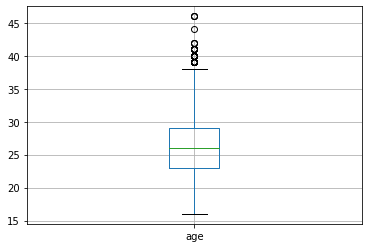

In [4]:
print(df.boxplot(column=['age']))  

In [5]:
df.describe()

,age,goals_selection,selections_nation,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
count,12711.000000,12711.000000,12711.000000,1.271100e+04,8434.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,...,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.0,12711.0
mean,26.072378,0.604909,5.788215,1.774767e+06,2.062604,11.850208,9.229172,0.100858,21.979152,26.707812,...,0.483046,0.008733,1.085123,1.194949,0.621745,0.943277,0.239556,0.038392,0.0,0.0
std,4.564766,2.632483,14.979703,7.240789e+06,1.148984,19.253330,15.210470,0.365367,23.806913,31.803922,...,1.925155,0.100365,2.787263,3.484809,1.986923,6.129151,1.803737,0.336510,0.0,0.0
min,16.000000,0.000000,0.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,23.000000,0.000000,0.000000,1.000000e+05,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,26.000000,0.000000,0.000000,3.000000e+05,2.000000,4.000000,3.000000,0.000000,15.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,29.000000,0.000000,4.000000,8.000000e+05,3.000000,16.000000,12.000000,0.000000,34.000000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,46.000000,85.000000,176.000000,2.000000e+08,8.000000,423.000000,174.000000,6.000000,216.000000,234.000000,...,44.000000,3.000000,30.000000,51.000000,47.000000,195.000000,59.000000,15.000000,0.0,0.0


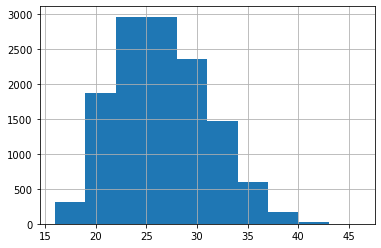

In [6]:
df['age'].hist()

In [7]:
df.position.unique()

array(['Goalkeeper', 'RightWinger', 'SecondStriker', 'AttackingMidfield',
       'Forward', 'CentralMidfield', 'DefensiveMidfield', 'Defender',
       'LeftWinger', 'Midfielder', 'RightMidfield', 'LeftMidfield'],
      dtype=object)

In [8]:
df.groupby(['position'])['price'].max()  #which position is the richest
df.groupby(['nation'],sort=True)['price'].max()  #which nation is the richest

nation
Afghanistan       400000.0
Albania         20000000.0
Algeria         60000000.0
Angola           1500000.0
Argentina      160000000.0
                  ...     
Vietnam           100000.0
Wales           80000000.0
Yemen              75000.0
Zambia           2500000.0
Zimbabwe         9000000.0
Name: price, Length: 167, dtype: float64

In [9]:
df.groupby(['league'])['price'].max()    #check

league
1.Division                           900000.0
1.HNL                               6500000.0
2.Liga                               200000.0
2ÂªB0GrupoIII                       1000000.0
A0JuniorenBundesligaNord/Nordost     800000.0
                                      ...    
UAEGulfLeague                       3900000.0
USL1                                 200000.0
USLC                                1500000.0
V.League1                            300000.0
YouthPremierLiga                     600000.0
Name: price, Length: 74, dtype: float64

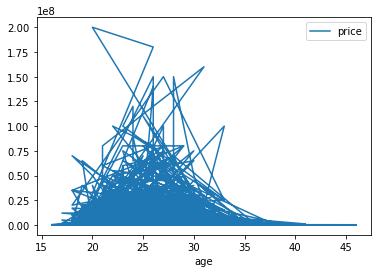

In [10]:
df.plot(x="age", y=["price"])

In [11]:
print(df[['age', 'price','selections_nation','end_contract','goal_champ','own_goal_champ','assist_champ','penalty_goal_champ']].corr())

                         age     price  selections_nation  end_contract  \
age                 1.000000 -0.021056           0.270320     -0.247230   
price              -0.021056  1.000000           0.288971      0.310136   
selections_nation   0.270320  0.288971           1.000000      0.052340   
end_contract       -0.247230  0.310136           0.052340      1.000000   
goal_champ          0.296757  0.317737           0.378999      0.052577   
own_goal_champ      0.194699  0.048375           0.097990      0.009555   
assist_champ        0.314235  0.326663           0.436602      0.067773   
penalty_goal_champ  0.318942  0.008409           0.092912     -0.010838   

                    goal_champ  own_goal_champ  assist_champ  \
age                   0.296757        0.194699      0.314235   
price                 0.317737        0.048375      0.326663   
selections_nation     0.378999        0.097990      0.436602   
end_contract          0.052577        0.009555      0.067773   
goal

In [12]:
df.columns

Index(['name', 'first_name', 'age', 'nation', 'league', 'team',
       'goals_selection', 'selections_nation', 'position', 'price',
       'end_contract', 'goal_champ', 'assist_champ', 'own_goal_champ',
       'sub_on_champ', 'sub_out_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'penalty_goal_champ',
       'conceded_goal_champ', 'clean_sheet_champ', 'goal_cup', 'assist_cup',
       'own_goal_cup', 'sub_on_cup', 'sub_out_cup', 'yellow_card_cup',
       'second_yellow_card_cup', 'red_card_cup', 'penalty_goal_cup',
       'conceded_goal_cup', 'clean_sheet_cup', 'goal_continent',
       'assist_continent', 'own_goal_continent', 'sub_on_continent',
       'sub_out_continent', 'yellow_card_continent',
       'second_yellow_card_continent', 'red_card_continent',
       'penalty_goal_continent', 'conceded_goal_continent',
       'clean_sheet_continent'],
      dtype='object')

AxesSubplot(0.125,0.125;0.62x0.755)


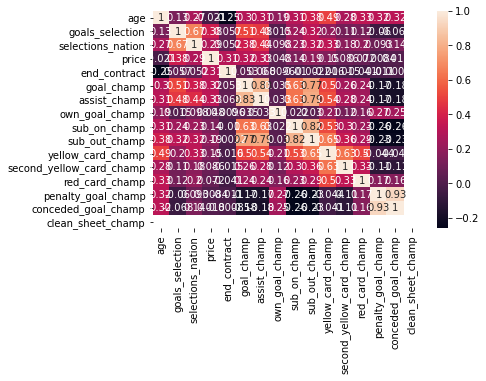

In [13]:
import seaborn as sb

print(sb.heatmap(df[[ 'age','goals_selection', 'selections_nation', 'price',
       'end_contract', 'goal_champ', 'assist_champ', 'own_goal_champ',
       'sub_on_champ', 'sub_out_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'penalty_goal_champ',
       'conceded_goal_champ', 'clean_sheet_champ']].corr(),annot=True))  #set size larger

In [14]:
df=df.dropna()
#def add_all(names):
 #   for name in names:
  #      df[name+str('_final')]=df[name+str('_champ')]+df[name+str('_cup')]+df[name+str('_continent')]
        
        
#add_all(['goal','assist','own_goal','sub_on','sub_out','yellow_card',
       #'second_yellow_card', 'red_card', 'penalty_goal',
       #'conceded_goal', 'clean_sheet'])
print(df.info())
x=df[['age','goals_selection', 'selections_nation',
       'end_contract', 'goal_champ', 'assist_champ', 'own_goal_champ',
       'sub_on_champ', 'sub_out_champ', 'yellow_card_champ','second_yellow_card_champ', 'red_card_champ', 'penalty_goal_champ',
       'conceded_goal_champ', 'clean_sheet_champ']].values
x = sklearn.preprocessing.normalize(x)
y=df[['price']].values

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 12710
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7671 non-null   object 
 1   first_name                    7671 non-null   object 
 2   age                           7671 non-null   int64  
 3   nation                        7671 non-null   object 
 4   league                        7671 non-null   object 
 5   team                          7671 non-null   object 
 6   goals_selection               7671 non-null   int64  
 7   selections_nation             7671 non-null   int64  
 8   position                      7671 non-null   object 
 9   price                         7671 non-null   float64
 10  end_contract                  7671 non-null   float64
 11  goal_champ                    7671 non-null   float64
 12  assist_champ                  7671 non-null   float64
 13  ow

In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)     

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
models_answers=linreg.predict(x_test)
m_s_e=mean_squared_error(y_test,models_answers)
m_a_e=mean_absolute_error(y_test,models_answers)
print(m_s_e,m_a_e)

82348564944065.38 3407421.091288456


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['pos1']=le.fit_transform(df['position'])
df['pos1']

<ipython-input-17-970ae3f7ce49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos1']=le.fit_transform(df['position'])


0         5
2        10
6         4
7         0
8         1
         ..
12705     3
12706     3
12708     2
12709     5
12710     5
Name: pos1, Length: 7671, dtype: int32

In [18]:
y=df[['pos1']].values.ravel()
x=df[['age','goals_selection', 'selections_nation',
       'end_contract', 'goal_champ', 'assist_champ', 'own_goal_champ',
       'sub_on_champ', 'sub_out_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'penalty_goal_champ',
       'conceded_goal_champ', 'clean_sheet_champ','price']].values
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

x = sklearn.preprocessing.normalize(x)

{0: 953, 1: 1386, 2: 64, 3: 1210, 4: 62, 5: 1514, 6: 262, 7: 823, 8: 122, 9: 264, 10: 853, 11: 158}


In [19]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [20]:
from sklearn.metrics import  accuracy_score
print(accuracy_score(y_pred,y_test))

0.19283387622149836


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=14)

In [22]:
knn.fit(x_train,y_train.ravel())
y_pred=knn.predict(x_test)


In [23]:
print(accuracy_score(y_pred,y_test))

0.45407166123778503


{1: 0.444299674267101, 2: 0.4091205211726384, 3: 0.43713355048859937, 4: 0.4403908794788274, 5: 0.44560260586319217, 6: 0.44104234527687297, 7: 0.4319218241042345, 8: 0.4364820846905538, 9: 0.4364820846905538, 10: 0.43908794788273614, 11: 0.4449511400651466, 12: 0.43973941368078173, 13: 0.4482084690553746, 14: 0.45407166123778503} {1: 0.444299674267101, 2: 0.4091205211726384, 3: 0.43713355048859937, 4: 0.4403908794788274, 5: 0.44560260586319217, 6: 0.44104234527687297, 7: 0.4319218241042345, 8: 0.4364820846905538, 9: 0.4364820846905538, 10: 0.43908794788273614, 11: 0.4449511400651466, 12: 0.43973941368078173, 13: 0.4482084690553746, 14: 0.45407166123778503}
0.45407166123778503 0.45407166123778503


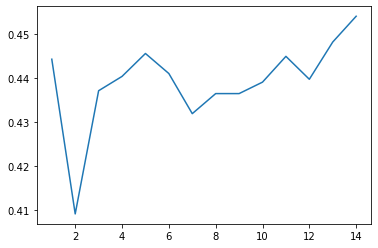

In [24]:
neig_and_acc={}#dict
neig_and_acc2={}#dict

for i in range(1,15):
       knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
       knn.fit(x_train, y_train.ravel())
       y_pred = knn.predict(x_test)
       neig_and_acc[i]=accuracy_score(y_pred,y_test)

       knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
       knn.fit(x_train, y_train.ravel())
       y_pred = knn.predict(x_test)
       neig_and_acc2[i] = accuracy_score(y_pred, y_test)

print(neig_and_acc,neig_and_acc2)
minkowsi_max=max(neig_and_acc.values())
euclidean_max=max(neig_and_acc2.values())
print(minkowsi_max,euclidean_max)#results are the same lol!!!!so distance formuala isnt mattering that much
 

import matplotlib.pyplot as plt
x_axis=list(neig_and_acc.keys())
y_axis=list(neig_and_acc.values())
plt.plot(x_axis,y_axis)
plt.show()


In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
svc=SVC()
rfc=RandomForestClassifier()
svc.fit(x_train,y_train.ravel())
rfc.fit(x_train,y_train.ravel())

y_pred1=svc.predict(x_test)
y_pred2=rfc.predict(x_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))

0.19283387622149836
0.4970684039087948


In [26]:
def initialize_parameters_deep(layer_dims):
    
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(
            layers_dims[l],
            layers_dims[l-1]
        )*np.sqrt(1/layers_dims[l-1])*10 #for sigmoid
        
        
        parameters['b' + str(l)] =np.zeros((layers_dims[l],1))#for sigmoid
        
        

        
    return parameters

In [27]:
def linear_forward(A, W, b):
    
    Z=np.dot(W,A)+b
    cache = (A, W, b)
    
    return Z, cache

def sigmoid(Z):

    A = 1 / (1 + np.exp(-Z))
    cache = Z

    return A, cache

def relu(Z):
    

    A = np.maximum(0,Z);

    assert(A.shape == Z.shape);

    cache = Z; 
    return A, cache;

In [28]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    
        
        
    
    elif activation == "relu":
        
        Z,linear_cache=linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
        
    cache = (linear_cache, activation_cache)

    return A, cache

In [29]:
    
    
    
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "sigmoid")
        caches.append(cache)
        
        
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
          
    return AL, caches

In [30]:
def compute_cost(AL, Y):
    
    
    m = Y.shape[1]

    #
    
    cost = -1 / m *(np.dot(Y,np.log(AL.T)) + np.dot(1 - Y,np.log(1 - AL).T))
   
    
    cost = np.squeeze(cost)      

    
    return cost

In [31]:
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    #print(cache)
    
    dW = 1 / m * (np.dot(dZ,A_prev.T))
    db = 1 / m * (np.sum(dZ,axis = 1,keepdims = True))
    dA_prev = np.dot(W.T,dZ)
    
    
    
    return dA_prev, dW, db

In [32]:
def sigmoid_backward(dA, cache):
    

    Z = cache;

    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)

    assert (dZ.shape == Z.shape)

    return dZ

In [33]:
def relu_backward(dA, cache):
    
    Z = cache;
    dZ = np.array(dA, copy = True)
    
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ


def linear_activation_backward(dA, cache, activation):
   
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA, activation_cache)
     
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
        
        
    elif activation == "sigmoid":
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    
    return dA_prev, dW, db

In [34]:


def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
   
    current_cache = caches[L-1]
    dA_prev, dW, db=linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    grads["dA" + str(L-1)]=dA_prev
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    
   
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
        

    return grads

def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
   
    current_cache = caches[L-1]
    dA_prev, dW, db=linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    grads["dA" + str(L-1)]=dA_prev
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    
   
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
        

    return grads

In [35]:


def update_parameters(params, grads, learning_rate):
    
    parameters = params.copy()
    L = len(parameters) // 2 
    for l in range(L):
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW"+ str(l+1)]
        parameters["b" + str(l+1)]=parameters["b" + str(l+1)] - learning_rate * grads["db"+ str(l+1)]
        
        
    return parameters

In [36]:

def L_layer_model(X, Y, layers_dims, learning_rate = 5, num_iterations = 3000, print_cost=False):
   
    
    costs = []                        
    
   
    parameters=initialize_parameters_deep(layers_dims)
    x_axis=[]
    
    for i in range(0, num_iterations):

        
        
        AL,caches=L_model_forward(X, parameters)
        
        cost=compute_cost(AL, Y)
        
        grads=L_model_backward(AL, Y, caches)
       
        parameters=update_parameters(parameters, grads, learning_rate)
        
        
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            x_axis.append(i)
            costs.append(cost)
    
    return parameters, costs,x_axis

In [37]:
layers_dims=[16,8,4,12]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80093859992)

y_train=y_train.T
x_train=x_train.T

y_train=y_train.reshape(1,-1)
x_test=x_test.T
y_test=y_test.T
y_test=y_test.reshape(1,-1)
#print(y_train.shape[1])
y_train_new = np.zeros([12, y_train.shape[1]])
y_test_new = np.zeros([12, y_test.shape[1]])
#surveys_df.iloc[0:3, 1:4]
i=0;
for example in y_train:
    print(example)
    y_train_new[i][example]=1
    i+=1
for example in y_test:
    print(example)
    y_test_new[i][example]=1
    i+=1
y_test_new.shape

    

[ 7 10 10 ... 10  5  3]
[ 5  5 10 ...  5  5  1]


(12, 1528)

In [38]:
parameters, costs,x_axis = L_layer_model(x_train, y_train_new, layers_dims, num_iterations = 1000, print_cost = True)


Cost after iteration 0: [[2.77095580e-02 1.74320365e+01 2.52228778e+00 2.75988486e+00
  6.29256363e+00 4.14500933e-01 4.53415021e+00 1.47374131e-02
  1.74265522e-02 5.23383859e-01 4.72146776e+00 2.02018126e-01]
 [6.91055977e-07 1.74661548e+01 2.52706159e+00 2.76515937e+00
  6.30487567e+00 4.13191811e-01 4.54300326e+00 7.93777035e-04
  1.43703486e-04 5.22649033e-01 4.73069100e+00 1.99063012e-01]
 [6.91055977e-07 1.74661548e+01 2.52706159e+00 2.76515937e+00
  6.30487567e+00 4.13191811e-01 4.54300326e+00 7.93777035e-04
  1.43703486e-04 5.22649033e-01 4.73069100e+00 1.99063012e-01]
 [6.91055977e-07 1.74661548e+01 2.52706159e+00 2.76515937e+00
  6.30487567e+00 4.13191811e-01 4.54300326e+00 7.93777035e-04
  1.43703486e-04 5.22649033e-01 4.73069100e+00 1.99063012e-01]
 [6.91055977e-07 1.74661548e+01 2.52706159e+00 2.76515937e+00
  6.30487567e+00 4.13191811e-01 4.54300326e+00 7.93777035e-04
  1.43703486e-04 5.22649033e-01 4.73069100e+00 1.99063012e-01]
 [6.91055977e-07 1.74661548e+01 2.5270615

Cost after iteration 400: [[1.41374303e-02 1.64521197e-02 2.23125213e-02 1.73523586e-02
  2.60608089e-02 1.65594682e-02 2.81352524e-02 1.65961211e-02
  1.66391615e-02 1.65460872e-02 2.50645515e-02 1.64642201e-02]
 [1.95168087e-03 2.49939684e-04 1.10120567e-05 1.49776979e-04
  1.60861042e-06 2.34743774e-04 5.55931670e-07 2.29798368e-04
  2.24141125e-04 2.36579253e-04 2.68027536e-06 2.48171752e-04]
 [1.95168087e-03 2.49939684e-04 1.10120567e-05 1.49776979e-04
  1.60861042e-06 2.34743774e-04 5.55931670e-07 2.29798368e-04
  2.24141125e-04 2.36579253e-04 2.68027536e-06 2.48171752e-04]
 [1.95168087e-03 2.49939684e-04 1.10120567e-05 1.49776979e-04
  1.60861042e-06 2.34743774e-04 5.55931670e-07 2.29798368e-04
  2.24141125e-04 2.36579253e-04 2.68027536e-06 2.48171752e-04]
 [1.95168087e-03 2.49939684e-04 1.10120567e-05 1.49776979e-04
  1.60861042e-06 2.34743774e-04 5.55931670e-07 2.29798368e-04
  2.24141125e-04 2.36579253e-04 2.68027536e-06 2.48171752e-04]
 [1.95168087e-03 2.49939684e-04 1.10120

Cost after iteration 800: [[1.41374268e-02 1.76807442e-02 2.23963713e-02 1.82130276e-02
  2.60738028e-02 1.77392583e-02 2.81401335e-02 1.77594062e-02
  1.77834903e-02 1.77318846e-02 2.50857917e-02 1.76873203e-02]
 [1.95531638e-03 1.25007512e-04 1.05468647e-05 9.36783236e-05
  1.59793703e-06 1.21074755e-04 5.54543901e-07 1.19751329e-04
  1.18189526e-04 1.21562991e-04 2.65125066e-06 1.24558806e-04]
 [1.95531638e-03 1.25007512e-04 1.05468647e-05 9.36783236e-05
  1.59793703e-06 1.21074755e-04 5.54543901e-07 1.19751329e-04
  1.18189526e-04 1.21562991e-04 2.65125066e-06 1.24558806e-04]
 [1.95531638e-03 1.25007512e-04 1.05468647e-05 9.36783236e-05
  1.59793703e-06 1.21074755e-04 5.54543901e-07 1.19751329e-04
  1.18189526e-04 1.21562991e-04 2.65125066e-06 1.24558806e-04]
 [1.95531638e-03 1.25007512e-04 1.05468647e-05 9.36783236e-05
  1.59793703e-06 1.21074755e-04 5.54543901e-07 1.19751329e-04
  1.18189526e-04 1.21562991e-04 2.65125066e-06 1.24558806e-04]
 [1.95531638e-03 1.25007512e-04 1.05468

In [39]:
def predict(X, y, parameters):
   

    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))

   
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
            print(probas[0,i])
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

In [40]:
predictions_train = predict(x_train, y_train, parameters)

Accuracy: 0.12746215204297573


In [41]:
predictions_test = predict(x_test, y_test, parameters)

Accuracy: 0.11125654450261782
